# Logistic Regression

## Imports

In [17]:
import numpy as np
from keras.datasets import mnist
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

## Preprocessing

In [18]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## Doing a subset as I cannot process the full dataset on my laptop
train_size = 10000
test_size = 2000

train_images_flat = train_images[:train_size].reshape(train_size, -1) / 255.0
test_images_flat = test_images[:test_size].reshape(test_size, -1) / 255.0
train_labels_int = train_labels[:train_size]
test_labels_int = test_labels[:test_size]

pca = PCA(n_components = 100, random_state = 67)
train_pca = pca.fit_transform(train_images_flat)
test_pca = pca.transform(test_images_flat)
print(f"Explained variance with 100 components: {np.sum(pca.explained_variance_ratio_):.4f}")

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_pca)
test_scaled = scaler.transform(test_pca)

Explained variance with 100 components: 0.9169


## Training

### Training Loop

In [19]:
print("\nTraining Logistic Regression...")

log_reg = LogisticRegression(
    multi_class = 'multinomial',
    solver='lbfgs',
    max_iter = 500,
    C = 0.1,
    penalty = 'l2',
    random_state = 1,
    verbose = 1,
    n_jobs = -1
)

log_reg.fit(train_scaled, train_labels_int)


Training Logistic Regression...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


LogisticRegression(C=0.1, max_iter=500, multi_class='multinomial', n_jobs=-1,
                   random_state=1, verbose=1)

### Prediction

In [20]:
predictions = log_reg.predict(test_scaled)
accuracy = accuracy_score(test_labels_int, predictions)

print(f"\nAccuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(test_labels_int, predictions))


Accuracy: 0.8790

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       175
           1       0.92      0.98      0.95       234
           2       0.90      0.84      0.87       219
           3       0.90      0.85      0.87       207
           4       0.89      0.89      0.89       217
           5       0.81      0.82      0.82       179
           6       0.87      0.90      0.88       178
           7       0.85      0.86      0.85       205
           8       0.85      0.83      0.84       192
           9       0.85      0.85      0.85       194

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



## Visualization

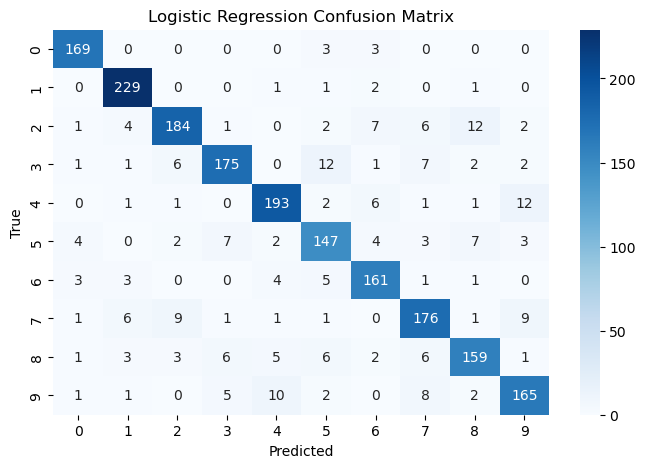

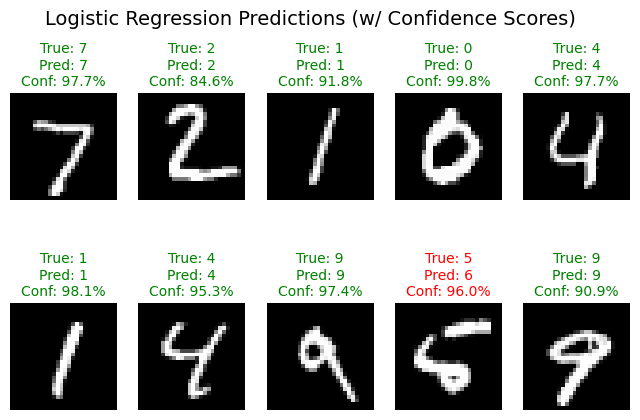

In [21]:
## cm
cm = confusion_matrix(test_labels_int, predictions)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## sample predictions
plt.figure(figsize = (8, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    prob = log_reg.predict_proba(test_scaled[i : i + 1])[0]
    confidence = np.max(prob) * 100
    plt.title(f'True: {test_labels_int[i]}\nPred: {predictions[i]}\nConf: {confidence:.1f}%', 
              fontsize=10, 
              color='green' if test_labels_int[i] == predictions[i] else 'red')
    plt.axis('off')
plt.suptitle('Logistic Regression Predictions (w/ Confidence Scores)', fontsize=14)
plt.show()